In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cogsci 131 - Assignment 10
Selena Zhang

## Question 1
The entropy of all the words in the English language is the average number of bits of information that we need in order to determine which word we want. Below, we can see that the calculated entropy is 8.93819.

In [10]:
df = pd.read_csv("Assignment10-WordFrequencies.csv", header=None, names=["words", "frequency"])
def hx(inp):
    #takes in list of probabilities and then takes the log, returns sum.
    summ = 0
    for i in inp:
        summ += np.log2(i)*-i
    return summ
#setup
p = []
freq = []
count = 0

for i in range(len(df["words"])):
    freq.append(df.loc[i][1])
    count += freq[i]

for i in range(len(df["words"])):
    p.append(freq[i]/count)

hx(p)

8.938139929017918

## Question 2
The 20 questions game is fair if you choose the word by frequency. A game, by definition, is fair if you can win at least 50% of the time. We calculated the entropy of the English language to be around 9, which is less than 20. This means that, on average, you would need 9 tries in order to guess the word. You have 11 additional questions, so you could ask 10, 11... 20 questions, which would increase your probability of winning to be greater than 50% (12/20 > 50), making it fair for you. 

## Question 3


In [13]:
#uniform frequency
p_3 = []

for i in range(len(df["words"])):
    p_3.append(1/len(df["words"]))

hx(p_3)

15.339502088876621

Here, we see that the entropy with a uniform selection of the word is 15.3. Using the same logic as in part 2, this would not be a fair game, because you would need on average 15 bits of information to guess the word. You could ask 5 additional questions; however, this would put your chances of guessing it right to be much less than 50%. Thus, this game is not fair for you.

## Question 4

In [157]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
           'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
           's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
df['first_letter'] = df['words'].astype(str).str[0]
total = len(df["words"])
condo_first = []
#frequency of all letters starting with one letter
for l in letters:
    #frequency of all that start with letter L
    freq_letter = []
    #probability = freq(cat)/freq(all c's)
    prob_temp = []
    for i in range(total):
        if df["first_letter"][i] == l:
            #collect all the words with same letters
            freq_letter.append(float(df.loc[i][1]))
    #find denominator values
    summ = np.cumsum(freq_letter)[-1]
    for i in range(len(freq_letter)):
        prob_temp.append(freq_letter[i]/summ)
    condo_first.append(hx(prob_temp))

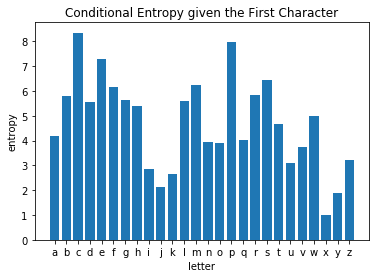

In [46]:
#plotting
plt.bar(letters, condo_first)
plt.xlabel("letter")
plt.ylabel("entropy")
plt.title("Conditional Entropy given the First Character")
plt.show()

## Question 5

In [179]:
#making last letter row
df['last_letter'] = df['words'].astype(str).str[-1]
num_of_words = len(df)
vowels = ['a', 'e', 'i', 'o', 'u']

#make a column with first vowel
v = []
def has_vowel(l):
    check = []
    for i in l:
        if i in vowels:
            check.append("yes")
    if len(check) == 0:
        return 0
    else:
        return 1
for i in range(num_of_words):
    word = str(df["words"][i])
    if has_vowel(word) == 0:
        v.append("na")
    else:
        for letter in word:
            if letter in vowels:
                v.append(letter)
                break
df["first_vowel"] = v
            
#vowel frequency
vowels_word_count = {'a' : 0,
                    'e' : 0,
                    'i' : 0,
                    'o' : 0,
                    'u' : 0}
for row in range(num_of_words):
    for letter in str(df.iloc[row, 0]):
        if letter in vowels:
            vowels_word_count[letter] += df.iloc[row, 1]
            break
df.head()

,words,frequency,first_letter,last_letter,first_vowel
0,i,152884,i,i,i
1,and,128635,a,d,a
2,the,123648,t,e,e
3,you,106042,y,u,o
4,it,99341,i,t,i


In [224]:
vowels_word_count

{'a': 845203, 'e': 833444, 'i': 699639, 'o': 973579, 'u': 315309}

In [233]:
#first letter
mutual_info = []

pxd=[]
prob_outer = []

for l in letters:
    summat = 0
    pr_temp = []
    p = []
    freq = []
    #count: all frequencies, summat = frequency of the specific letter
    count = 0
    for i in range(len(df["words"])):
        freq.append(df.loc[i][1])
        count += freq[i]
    for i in range(len(df["words"])):
        p.append(freq[i]/count)
    #for loop to get the final value of the denominator
    for i in range(total):
        if df["first_letter"][i] == l:
            summat += p[i]
    #separate for loop to get the probabilities to pass into hx()
    for i in range(total):
        if df["first_letter"][i] == l:
            pr_temp.append(p[i] / summat)
    #append to preset arrays
    prob_outer.append(summat)
    pxd.append(hx(pr_temp))

#subtracting to find true mutual information
mutual_info.append(hx(p))
reduced = np.dot(prob_outer, pxd)
mutual_info[0] -= reduced


In [ ]:
#last letter
#same algorithm as first letter
pxd=[]
prob_outer = []
for l in letters:
    summat = 0
    pr_temp = []
    p = []
    freq = []
    count = 0
    for i in range(len(df["words"])):
        freq.append(df.loc[i][1])
        count += freq[i]
    for i in range(len(df["words"])):
        p.append(freq[i]/count)
    #for loop to get the final value of the denominator
    for i in range(total):
        if df["last_letter"][i] == l:
            summat += p[i]
    #separate for loop to get the probabilities to pass into hx()
    for i in range(total):
        if df["last_letter"][i] == l:
            pr_temp.append(p[i] / summat)
    prob_outer.append(summat)
    pxd.append(hx(pr_temp))

#subtracting to find true mutual information
mutual_info.append(hx(p))
reduced = np.dot(prob_outer, pxd)
mutual_info[1] -= reduced


In [ ]:
#first vowel
pxd = []
prob_outer = []
tot = vowels_word_count['a'] + vowels_word_count['e'] + vowels_word_count['i'] 
+ vowels_word_count['o'] + vowels_word_count['u']
for v in vowels:
    pr_temp = []
    v_freq = vowels_word_count[v]/tot
    for i in range(total):
        if df["first_vowel"][i] == v:
            pr_temp.append(p[i] / v_freq)
    prob_outer.append(v_freq)
    pxd.append(hx(pr_temp))

#subtracting to find true mutual information
mutual_info.append(hx(p))
reduced = np.dot(prob_outer, pxd)
mutual_info[2] -= reduced

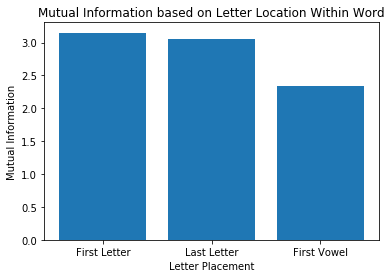

In [230]:
#plotting
labels = ["First Letter", "Last Letter", "First Vowel"]
plt.bar(labels, mutual_info)
plt.xlabel("Letter Placement")
plt.ylabel("Mutual Information")
plt.title("Mutual Information based on Letter Location Within Word")
plt.show()

I would predict that the first letter is the most important for word recongition. By definition, the greater the mutual information, the greater your uncertainty is reduced. Based on the graph above, the first letter carries the most amount of mutual information, which would reduce your uncertainty by the greatest amount.

## Question 6

In [201]:
#add new column to df of length of word
l = []
for i in range(total):
    l.append(len(str(df["words"][i])))
df["length"] = l
max_length = max(l)
df.head()

,words,frequency,first_letter,last_letter,first_vowel,length
0,i,152884,i,i,i,1
1,and,128635,a,d,a,3
2,the,123648,t,e,e,3
3,you,106042,y,u,o,3
4,it,99341,i,t,i,2


In [231]:
surprisals = []
lengths = range(1, max_length + 1)
for i in lengths:
    #append frequency if the length matches the iteration
    freq_list = []
    for j in range(total):
        if df["length"][j] == i:
            freq_list.append(float(df.loc[j][1]))
    #0 case
    if len(freq_list) == 0:
        surprisals.append(0)
    #surprisal definition
    else:
        div = np.cumsum(freq_list)[-1]
        freq_list = [x/div for x in freq_list]
        freq_list = [-np.log2(x) for x in freq_list]
        surprisals.append(np.mean(freq_list))

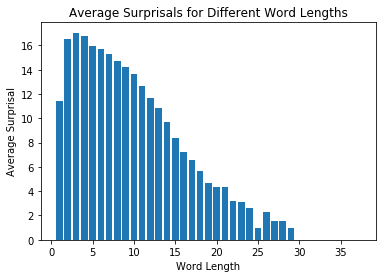

In [222]:
#plotting
plt.bar(lengths, surprisals)
plt.title("Average Surprisals for Different Word Lengths")
plt.xlabel("Word Length")
plt.ylabel("Average Surprisal")
plt.show()

I would expect that an efficient code in Shannon's sense would have a consistently increasing surprisal. We know that surprisal is defined as -log(p). That means that if a word has a high frequency, then it does not need as much information to convey itself, which means that it should have a low surprisal. Conversely, a low frequency word should have a higher surprisal. In this graph, we can see that English is not an efficient code, because words with the highest frequencies, which are words with generally shorter lengths, have the highest surprisal, while words with the longest lengths have the smallest surprisals. This is the inverse of what we expect an efficient code to be.

## Question 7

My way to determine efficiency would be to subtract the surprisal value from the entropy value.